![title](trio.jpg)

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize, imread
from sklearn.cluster import KMeans
import pickle
import warnings
warnings.filterwarnings("ignore")

![](martix_rgb.png)

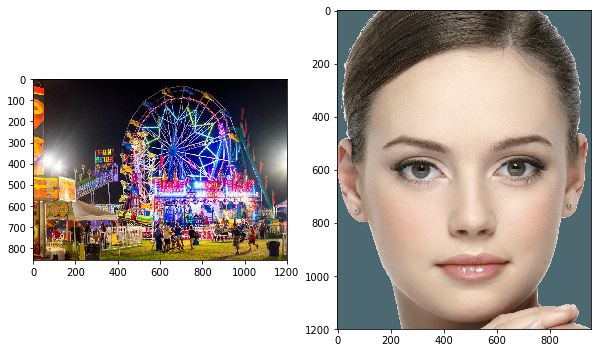

In [55]:
def show_image(path, path_1=None):
    image = imread(path)
    fig = plt.figure(figsize=(10, 10))

    if path_1:
        image_1 = imread(path_1)
        fig.add_subplot(1, 2, 1)
        plt.imshow(image)
        fig.add_subplot(1, 2, 2)
        plt.imshow(image_1)
    else:
        fig.add_subplot(1, 2, 2)
        plt.imshow(image)
    
show_image('images/431.jpg', 'images/432.jpg')

## Training a KMeans model

In [3]:
kmeans = KMeans(n_clusters=128)

In [4]:
image = imread('images/431.jpg')
image = imresize(image, 0.4)

In [5]:
preprocessed = image.reshape((image.shape[0]*image.shape[1], 3))
kmeans.fit(preprocessed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=128, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
# saving the model

with open('model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)


## Loading a pretrained model

In [8]:
with open('model.pkl', 'rb') as file:
    kmeans = pickle.load(file)


## Preprocessing images

In [9]:
def preprocess(path):
    image = imread(path)
    image = imresize(image, 0.4)
    image = image.reshape((image.shape[0]*image.shape[1], image.shape[2]))
    colors = kmeans.predict(image)
    unique, counts = np.unique(colors, return_counts=True)
    arr = np.zeros((128, ), dtype='int64')
    arr[unique] = counts
    return arr

![title](dot_product.png)

In [16]:
def cosine_similarity(a, b):    
    dot_product = np.sum(a * b)    
    module_a = np.sqrt(np.sum(a**2))
    module_b = np.sqrt(np.sum(b**2))
    return dot_product / (module_a * module_b)

def compute_similarity(path_0, path_1):
    a = preprocess(path_0)
    b = preprocess(path_1)
    return cosine_similarity(a, b)

In [22]:
similarity_score = compute_similarity('images/426.jpg', 'images/421.jpg')

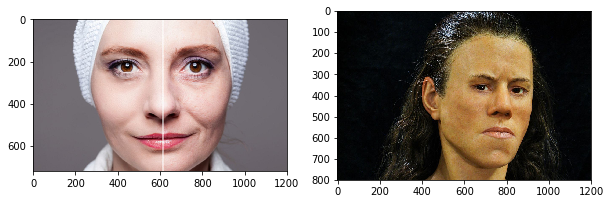

In [23]:
show_image('images/426.jpg', 'images/421.jpg')

In [24]:
print("Similarity score:", similarity_score)

Similarity score: 0.012900032094842109


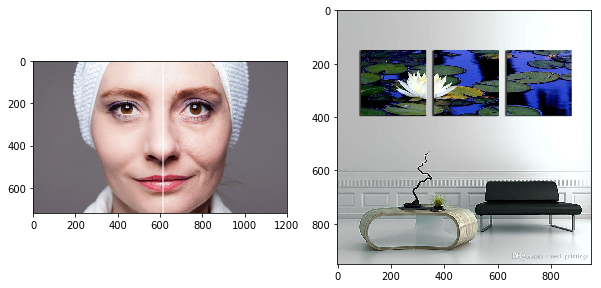

In [14]:
show_image('images/426.jpg', 'images/423.jpg')

In [25]:
similarity_score = compute_similarity('images/426.jpg', 'images/423.jpg')
print("Similarity score:", similarity_score)

Similarity score: 0.18644235396781628


In [49]:
image_files = ['images/'+path for path in os.listdir('images/')]
main_image = image_files.pop(10)

data = []

for image_path in image_files:
    similarity_score = compute_similarity(main_image, image_path)
    data.append([main_image, image_path, similarity_score])

In [50]:
data = pd.DataFrame(data, columns=['main image', 'compared to', 'similarity score'])

In [51]:
data.head(10)

,main image,compared to,similarity score
0,images/314.jpg,images/291.jpg,0.863150
1,images/314.jpg,images/292.jpg,0.244159
2,images/314.jpg,images/293.jpg,0.326607
3,images/314.jpg,images/297.jpg,0.424669
4,images/314.jpg,images/298.jpg,0.216433
5,images/314.jpg,images/302.jpg,0.180742
6,images/314.jpg,images/303.jpg,0.180742
7,images/314.jpg,images/304.jpg,0.814225
8,images/314.jpg,images/309.jpg,0.546387
9,images/314.jpg,images/310.jpg,0.307989


In [42]:
data['similarity score'].min()

0.006075764744185894

In [46]:
row_number = data['similarity score'].argmin()
data.iloc[row_number]

main image          images/291.jpg
compared to         images/435.jpg
similarity score        0.00607576
Name: 83, dtype: object

In [48]:
data.loc[data['similarity score'] < 0.1]

,main image,compared to,similarity score
3,images/291.jpg,images/298.jpg,0.083438
4,images/291.jpg,images/302.jpg,0.098913
5,images/291.jpg,images/303.jpg,0.098913
8,images/291.jpg,images/310.jpg,0.097525
10,images/291.jpg,images/315.jpg,0.028727
11,images/291.jpg,images/316.jpg,0.028727
18,images/291.jpg,images/327.jpg,0.081351
26,images/291.jpg,images/339.jpg,0.051470
31,images/291.jpg,images/355.jpg,0.020298
43,images/291.jpg,images/383.jpg,0.015432


In [52]:
data.sort_values('similarity score')

,main image,compared to,similarity score
83,images/314.jpg,images/435.jpg,0.000188
63,images/314.jpg,images/404.jpg,0.027544
43,images/314.jpg,images/383.jpg,0.037119
68,images/314.jpg,images/411.jpg,0.043407
76,images/314.jpg,images/421.jpg,0.050543
31,images/314.jpg,images/355.jpg,0.050916
79,images/314.jpg,images/430.jpg,0.051330
75,images/314.jpg,images/419.jpg,0.052008
50,images/314.jpg,images/390.jpg,0.052941
74,images/314.jpg,images/418.jpg,0.053619
